In [1]:
# matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, select

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
stations = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
result = session.execute(func.max(measurement.date)).scalar()
print(result)

2017-08-23


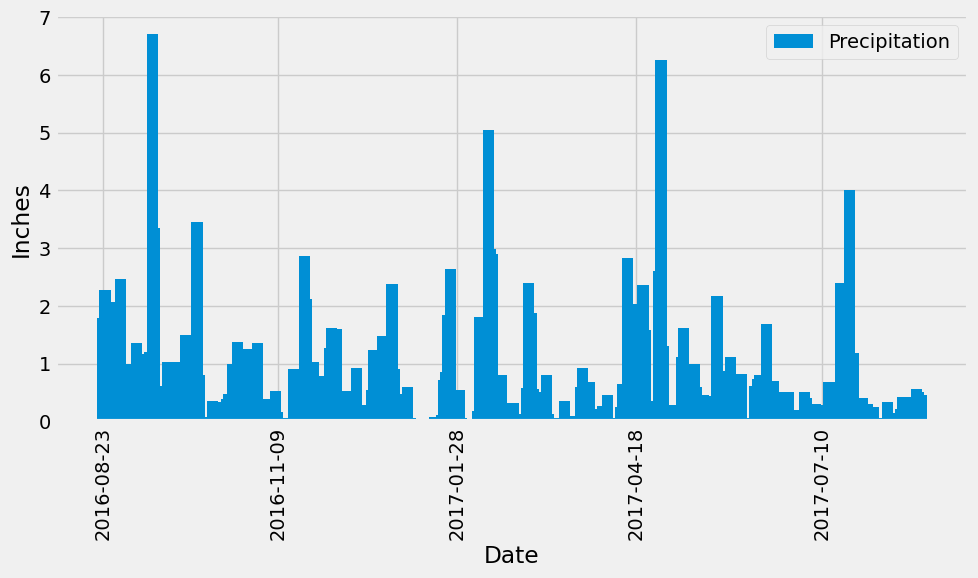

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
year_before = "2016-08-23"

# Perform a query to retrieve the data and precipitation scores
last_year = session.query(measurement.date, measurement.prcp).filter(
    measurement.date >= year_before,
    measurement.date <= result
).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_df = pd.DataFrame(last_year, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
last_year_df = last_year_df.sort_values('Date')
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(last_year_df['Date'], last_year_df['Precipitation'], width=5, label="Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
xticks = ("2016-08-23", "2016-11-09", "2017-01-28", "2017-04-18", "2017-07-10")
plt.xticks(xticks, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(stations.station)).all()
total_stations

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

#Find the most active stations.
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), 
                     func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
temp

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

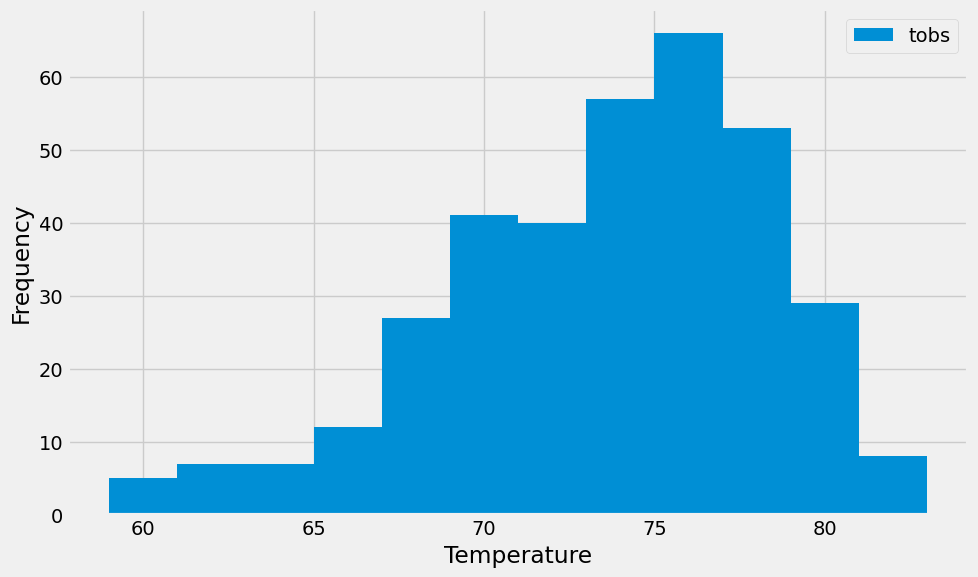

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(measurement.tobs).filter(
    measurement.date >= year_before,
    measurement.date <= result,
    measurement.station == 'USC00519281'
).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_temp = pd.DataFrame(year_temp, columns=['Temperature'])

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.hist(year_temp, bins=12, label='tobs')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend()
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()